# All dawgs go to heaven, but only some go to national championships

This notebook walks through my analysis of the live mascots used at the University of Washington and their winning percentages for football across their career.

The data used in this analysis comes from:  
* [The Seattle Times](https://www.seattletimes.com/sports/uw-husky-football/woo-woos-for-a-weary-world-uws-live-mascot-dubs-ii-spreads-cute-dog-content-to-the-masses/)  
* [Go Huskies](https://gohuskies.com/sports/2013/4/18/208229209.aspx)  
* [College Football Data API](https://api.collegefootballdata.com/api/docs/?url=/api-docs.json)

-------------
###  Setup

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as mtick
rcParams.update({'figure.autolayout': True})

Read in data about mascot history:

In [2]:
mascot_data = pd.read_csv("mascot_data.csv")
mascot_data.head()

,mascot_name,start_date,end_date
0,Frosty I,1922,1929
1,Frosty II,1930,1936
2,Wasky,1946,1946
3,Wasky II,1947,1953
4,Ski,1954,1957


---------------
### Data preparation

In [3]:
mascot_data["seasons"] = mascot_data["end_date"] - mascot_data["start_date"]
mascot_data.head()

,mascot_name,start_date,end_date,seasons
0,Frosty I,1922,1929,7
1,Frosty II,1930,1936,6
2,Wasky,1946,1946,0
3,Wasky II,1947,1953,6
4,Ski,1954,1957,3


I have to manually code the national championships because some sources claim the '91 title was shared (the reason you'll never see any Dawgs cheering for Miami...)

In [4]:
national_championships = [1960, 1984, 1990, 1991]

In [5]:
win_pcts = []
total_wins = []
colors = []

for index, row in mascot_data.iterrows(): 
    wins = 0
    total_games = 0
    seasons = list(range(row["start_date"], row["end_date"] + 1))
    color = "#363C74"
    for season in seasons:
        if season in national_championships:
            color = "#E8D3A2"
        parameters = {"year": season,"seasonType": "regular", "team": "Washington"}
        response = requests.get("https://api.collegefootballdata.com/games", params=parameters)
        games = response.json()
        for game in games:
            total_games += 1
            if (game["home_team"] == "Washington" and game["home_points"] > game["away_points"]) or (game["away_team"] == "Washington" and game["away_points"] > game["home_points"]):
                wins += 1
    win_pcts.append(wins / total_games)
    colors.append(color)
    total_wins.append(wins)
    
mascot_data["win_percentages"] = win_pcts
mascot_data["colors"] = colors
mascot_data.head()

,mascot_name,start_date,end_date,seasons,win_percentages,colors
0,Frosty I,1922,1929,7,0.740741,#363C74
1,Frosty II,1930,1936,6,0.629032,#363C74
2,Wasky,1946,1946,0,0.555556,#363C74
3,Wasky II,1947,1953,6,0.420290,#363C74
4,Ski,1954,1957,3,0.375000,#363C74


In [6]:
mascot_data.loc[mascot_data["mascot_name"] == "Dubs II", "end_date"] = "current"
mascot_data["labels"] = mascot_data["mascot_name"] + "\n (" + mascot_data["start_date"].apply(str) + "-" + mascot_data["end_date"].apply(str) + ")"

In [7]:
mascot_data["win_percentages"] = mascot_data["win_percentages"] * 100.0

----------
### Data visualization

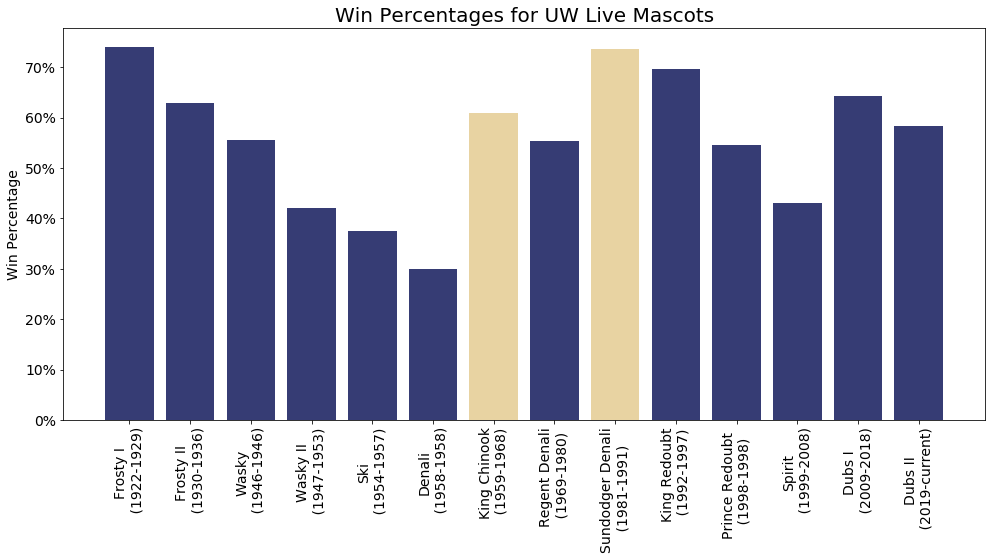

In [10]:
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
plt.bar(x=mascot_data.index, height=mascot_data.win_percentages, color=mascot_data.colors)
plt.xticks(mascot_data.index, mascot_data.labels, fontsize=14)
plt.title("Win Percentages for UW Live Mascots", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Win Percentage", fontsize=14)

fmt = '%.f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.savefig("all_dawgs_go_to_heaven.jpg")
plt.show()